In [1]:
import pandas as pd
import numpy as np

In [150]:
df_pls=pd.read_excel("df_merge_n.xlsx")

In [151]:
df_pls_pls=df_pls.drop(columns=['Unnamed: 0'])

In [152]:
df_pls_pls=df_pls_pls.fillna(0)

In [153]:
df_pls_new=df_pls_pls.drop(columns=['commission_code','number_of_cite'])

In [154]:
df_pls_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 47 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                    --------------  -----  
 0   region                                                                                                                    1583 non-null   object 
 1   city_or_district_within_the_region                                                                                        1583 non-null   object 
 2   area_in_the_city                                                                                                          1583 non-null   object 
 3   settlement                                                                                                                1583 non-nu

In [155]:
df_merge1=df_pls_new.drop(columns=['attachment1','attachment2','attachment3','attachment4','attachment5','comment','id','type','name','location','origin','area'])

In [156]:
df_merge1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 35 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                    --------------  -----  
 0   region                                                                                                                    1583 non-null   object 
 1   city_or_district_within_the_region                                                                                        1583 non-null   object 
 2   area_in_the_city                                                                                                          1583 non-null   object 
 3   settlement                                                                                                                1583 non-nu

In [158]:
df_merge1['lukashenko_share']=df_merge1['Lukashenko']/df_merge1['number_of_voters_who_took_part_in_the_voting']

In [159]:
df_merge1['lukashenko_share']=df_merge1['lukashenko_share'].replace([np.inf, -np.inf], 0)

In [160]:
df_merge1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 36 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                    --------------  -----  
 0   region                                                                                                                    1583 non-null   object 
 1   city_or_district_within_the_region                                                                                        1583 non-null   object 
 2   area_in_the_city                                                                                                          1583 non-null   object 
 3   settlement                                                                                                                1583 non-nu

In [211]:
df_merge2=df_merge1.drop(columns=['parent_id','description_x','commission_id','work_title','description_y','city_or_district_within_the_region','area_in_the_city','settlement'])

In [212]:
df_merge2.columns

Index(['region',
       'total_number_of_voters_at_the_polling_station_determined_by_the_list_of_citizens_entitled_to_participate_in_the_election',
       'number_of_voters_who_received_ballots',
       'number_of_voters_who_took_part_in_the_voting',
       'number_of_voters_who_took_part_in_the_early_voting',
       'number_of_voters_who_took_part_in_voting_at_the_place_of_residence',
       'number_of_voters_who_took_part_in_the_voting_on_election_day_at_the_polling_station',
       'Dmitriev', 'Kanopatskaya', 'Lukashenko', 'Tikhanovskaya', 'Cherechen',
       'number_of_votes_for_candidates_who_dropped_out_during_early_voting_period',
       'number_of_votes_againts_all_candidates',
       'number_of_votes_against_a_candidate_if_voting_was_held_on_one_candidate',
       'number_of_ballots_declared_invalid',
       'number_of_ballots_received_by_election_commission',
       'number_of_spoiled_ballots', 'number_of_unused_ballots', 'latitude',
       'longitude', 'doctor', 'army', 'edu

In [222]:
df_merge2['region'].unique()

array(['brestskaya', 'no_region', 'vitebskaya', 'gomelskaya',
       'grodnenskaya', 'miskaya', 'mogilevskaya', 'minsk'], dtype=object)

In [214]:
df_merge2['region']=df_merge2['region'].replace('Брестская','brestskaya')

In [215]:
df_merge2['region']=df_merge2['region'].replace('Витебская','vitebskaya')

In [216]:
df_merge2['region']=df_merge2['region'].replace('Гомельская','gomelskaya')

In [217]:
df_merge2['region']=df_merge2['region'].replace('Гродненская','grodnenskaya')

In [218]:
df_merge2['region']=df_merge2['region'].replace('Минская','miskaya')

In [219]:
df_merge2['region']=df_merge2['region'].replace('Могилевская','mogilevskaya')

In [220]:
df_merge2['region']=df_merge2['region'].replace('город Минск','minsk')

In [221]:
df_merge2.region=df_merge2.region.replace(0, 'no_region')

In [223]:
df_merge3=pd.get_dummies(df_merge2, 'region')

In [224]:
df_merge3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 35 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                    --------------  -----  
 0   total_number_of_voters_at_the_polling_station_determined_by_the_list_of_citizens_entitled_to_participate_in_the_election  1583 non-null   int64  
 1   number_of_voters_who_received_ballots                                                                                     1583 non-null   int64  
 2   number_of_voters_who_took_part_in_the_voting                                                                              1583 non-null   int64  
 3   number_of_voters_who_took_part_in_the_early_voting                                                                        1583 non-nu

In [225]:
df_merge3=df_merge3.fillna(0)

In [195]:
df_merge3.to_excel("df_merge3.xlsx")

In [226]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

In [228]:
# обязательный код
X=df_merge3.drop(columns=['lukashenko_share','Dmitriev','Kanopatskaya','Lukashenko','Tikhanovskaya','Cherechen']).values
y=df_merge3.lukashenko_share.values
# сплитуйте X и y как хотите
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, 
                                                    shuffle=True)

In [229]:
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [230]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1600, num = 8)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 90, num = 9)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600]}


In [231]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   56.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [232]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [233]:
y_pred=rf_random.predict(X_test)
print('Правильность на обучающем наборе: {:.5f}'.format(rf_random.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.5f}'.format(rf_random.score(X_test, y_test))) 

Правильность на обучающем наборе: 0.93264
Правильность на тестовом наборе: 0.60233


In [234]:
importance_values=rf_random.best_estimator_.feature_importances_

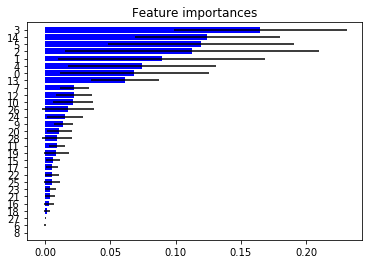

In [235]:
importances = rf_random.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_random.best_estimator_],
             axis=0)
indices = np.argsort(importances)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="b", xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X.shape[1]), indices)
plt.ylim([-1, X.shape[1]])
plt.show()

In [236]:
feature_importance_labels=df_merge3.drop(columns=['lukashenko_share','Dmitriev', 'Kanopatskaya', 'Lukashenko', 'Tikhanovskaya', 'Cherechen'])

In [237]:
column_names=list(feature_importance_labels.columns)

In [238]:
column_names

['total_number_of_voters_at_the_polling_station_determined_by_the_list_of_citizens_entitled_to_participate_in_the_election',
 'number_of_voters_who_received_ballots',
 'number_of_voters_who_took_part_in_the_voting',
 'number_of_voters_who_took_part_in_the_early_voting',
 'number_of_voters_who_took_part_in_voting_at_the_place_of_residence',
 'number_of_voters_who_took_part_in_the_voting_on_election_day_at_the_polling_station',
 'number_of_votes_for_candidates_who_dropped_out_during_early_voting_period',
 'number_of_votes_againts_all_candidates',
 'number_of_votes_against_a_candidate_if_voting_was_held_on_one_candidate',
 'number_of_ballots_declared_invalid',
 'number_of_ballots_received_by_election_commission',
 'number_of_spoiled_ballots',
 'number_of_unused_ballots',
 'latitude',
 'longitude',
 'doctor',
 'army',
 'education',
 'science',
 'prof_union',
 'economics',
 'region_brestskaya',
 'region_gomelskaya',
 'region_grodnenskaya',
 'region_minsk',
 'region_miskaya',
 'region_mogile

In [239]:
values_imp=list(importance_values)

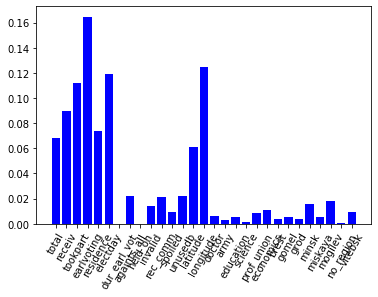

In [241]:
import numpy as np
import matplotlib.pyplot as plt 
 
courses = ['total','receiv','tookpart','earlvoting','residence','electday','dur_earl_vot','againts_all','held_on','invalid','rec_comm','spoiled','unusedb','latitude','longitude','doctor','army','education','science','prof_union','economics','brest','gomel', 'grod','minsk','miskaya','mogilev','no_region','vitebsk']
values = values_imp

plt.bar(courses, values, color ='blue')

plt.xticks(rotation = 60)
plt.show()

In [136]:
df_merge3.isna().sum()

total_number_of_voters_at_the_polling_station_determined_by_the_list_of_citizens_entitled_to_participate_in_the_election    0
number_of_voters_who_received_ballots                                                                                       0
number_of_voters_who_took_part_in_the_early_voting                                                                          0
number_of_voters_who_took_part_in_voting_at_the_place_of_residence                                                          0
number_of_voters_who_took_part_in_the_voting_on_election_day_at_the_polling_station                                         0
Dmitriev                                                                                                                    0
Kanopatskaya                                                                                                                0
Lukashenko                                                                                                            